# Toxic comment classification

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
pd.set_option('display.max_colwidth', None)
np.random.seed(314)

## 1. Data discovery 

In [2]:
train = pd.read_csv('train.csv')

In [3]:
print('Training data classified over 6 themes')
train.head()

Training data classified over 6 themes


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [4]:
commentClasses = list(train.columns[2:])
print(f"The different sentiments are:")
[print('\t- ' + k) for k in commentClasses]
pass

The different sentiments are:
	- toxic
	- severe_toxic
	- obscene
	- threat
	- insult
	- identity_hate


<BarContainer object of 7 artists>

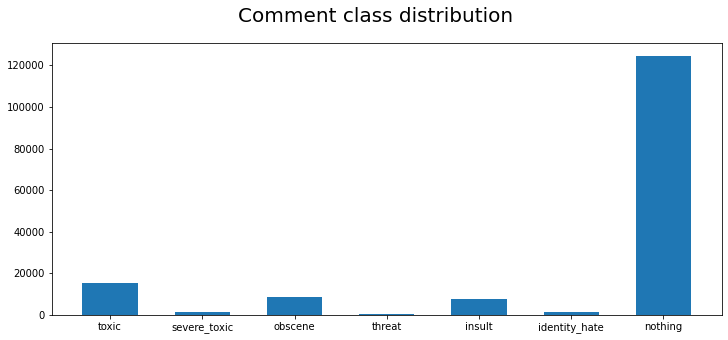

In [5]:
#Class distribution
counts = [train.loc[:, k].sum() for k in commentClasses]
noClass = train.shape[0] - np.array(counts).sum()
fig = plt.figure(figsize=(12, 5))

fig.suptitle('Comment class distribution', fontsize=20)
plt.bar(commentClasses + ['nothing'], counts + [noClass], width = 0.6)

<BarContainer object of 7 artists>

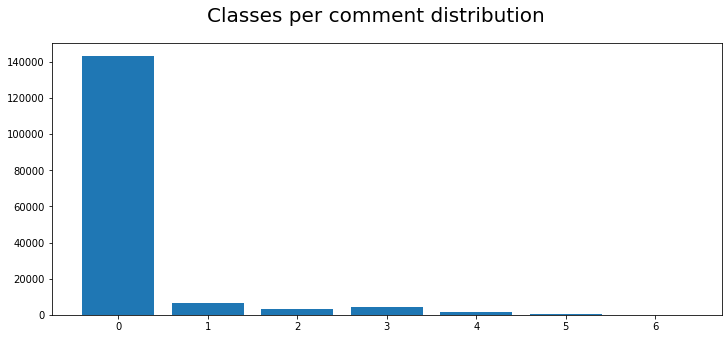

In [6]:
rowSums = train.loc[:, commentClasses].sum(axis=1)
fig = plt.figure(figsize=(12, 5))

fig.suptitle('Classes per comment distribution', fontsize=20)
plt.bar(rowSums.value_counts().index, rowSums.value_counts())

In [7]:
print(f'Proportion of comments without a label {(rowSums == 0).sum() / len(rowSums)}')

Proportion of comments without a label 0.8983211235124177


Most comments do not contain toxic speech

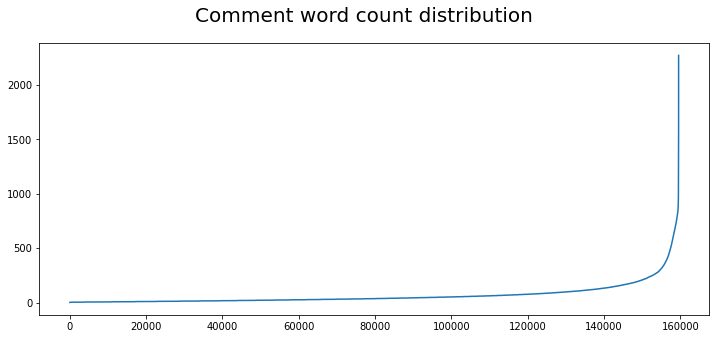

In [8]:
comLen = np.array(train.loc[:, 'comment_text'].apply(lambda x: len(x.split(' '))))
comLen.sort()
fig = plt.figure(figsize=(12, 5))

fig.suptitle('Comment word count distribution', fontsize=20)
plt.plot(comLen)


## 2. Word Clouds
### Explicit content ahead
### Pursue at your own risk

In [9]:
wcSW=set(STOPWORDS)
makeWC = lambda classRows: WordCloud(max_words=4000, min_font_size=5,
                      stopwords=wcSW, background_color="black", 
                      margin=10, random_state=1).generate(" ".join(classRows["comment_text"].values))

## Clean cloud

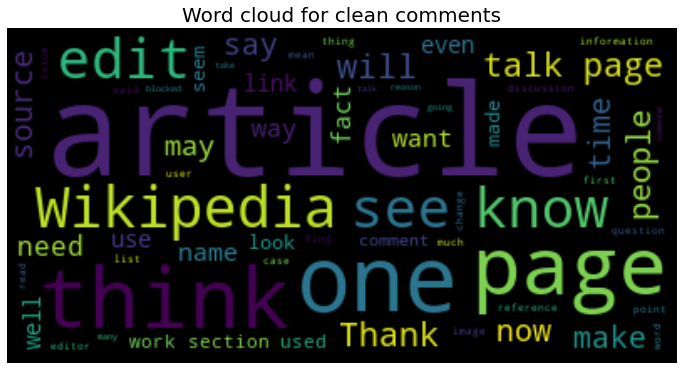

In [10]:
trainClean = train.loc[rowSums == 0]

cleanWC = makeWC(trainClean)
plt.figure(figsize=(12, 15))
plt.title("Word cloud for clean comments", fontsize=20)
plt.axis("off")
plt.imshow(cleanWC, interpolation = 'bilinear')

## Toxic cloud

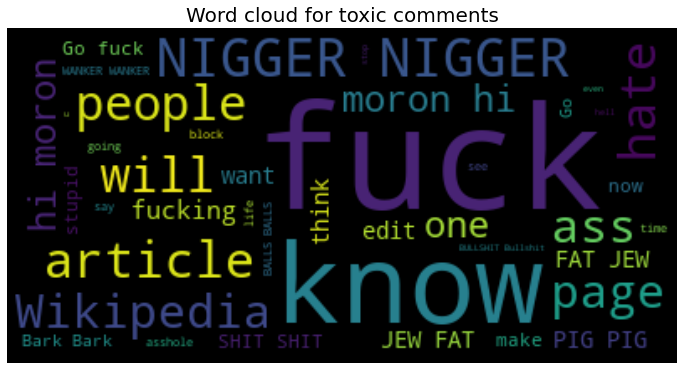

In [11]:
trainToxic = train.loc[train['toxic'] == 1]

toxicWC = makeWC(trainToxic)
plt.figure(figsize=(12, 15))
plt.title("Word cloud for toxic comments", fontsize=20)
plt.axis("off")
plt.imshow(toxicWC, interpolation = 'bilinear')

## Severely toxic cloud

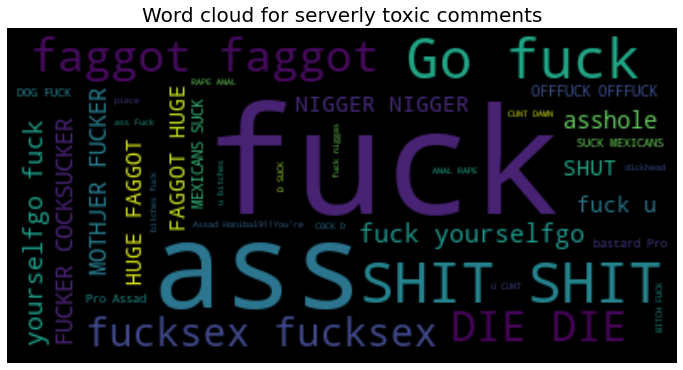

In [12]:
trainSevereToxic = train.loc[train['severe_toxic'] == 1]

toxicWC = makeWC(trainSevereToxic)
plt.figure(figsize=(12, 15))
plt.title("Word cloud for serverly toxic comments", fontsize=20)
plt.axis("off")
plt.imshow(toxicWC, interpolation = 'bilinear')

## Obscene cloud

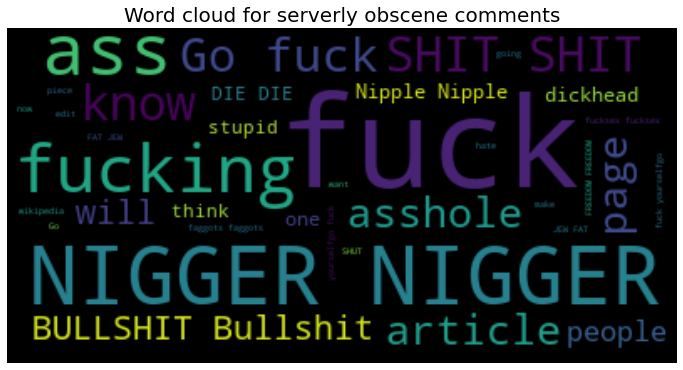

In [13]:
trainObscene = train.loc[train['obscene'] == 1]

obsceneWC = makeWC(trainObscene)
plt.figure(figsize=(12, 15))
plt.title("Word cloud for serverly obscene comments", fontsize=20)
plt.axis("off")
plt.imshow(obsceneWC, interpolation = 'bilinear')

## Threat cloud

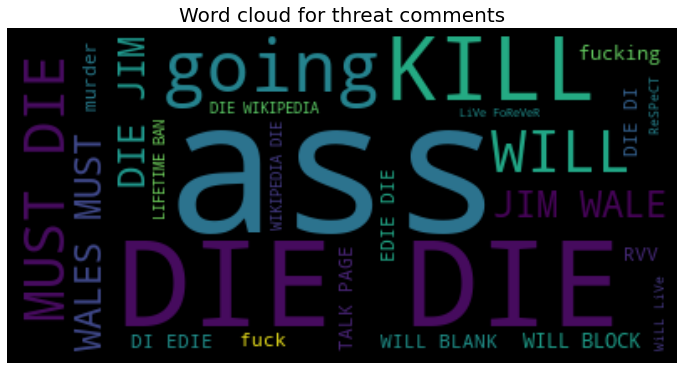

In [14]:
trainThreat = train.loc[train['threat'] == 1]

threatWC = makeWC(trainThreat)
plt.figure(figsize=(12, 15))
plt.title("Word cloud for threat comments", fontsize=20)
plt.axis("off")
plt.imshow(threatWC, interpolation = 'bilinear')

## Insult cloud

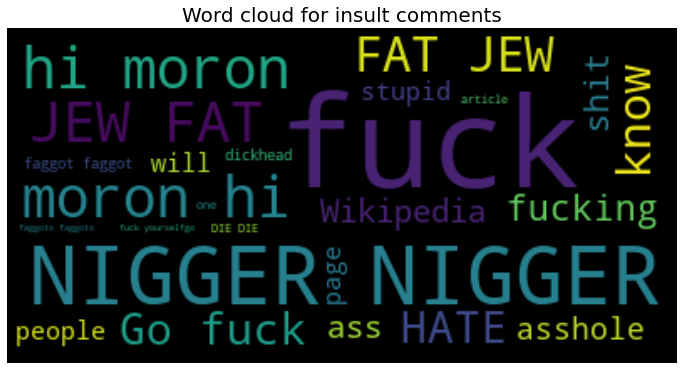

In [15]:
threatInsult = train.loc[train['insult'] == 1]

insultWC = makeWC(threatInsult)
plt.figure(figsize=(12, 15))
plt.title("Word cloud for insult comments", fontsize=20)
plt.axis("off")
plt.imshow(insultWC, interpolation = 'bilinear')

## Identity hate cloud

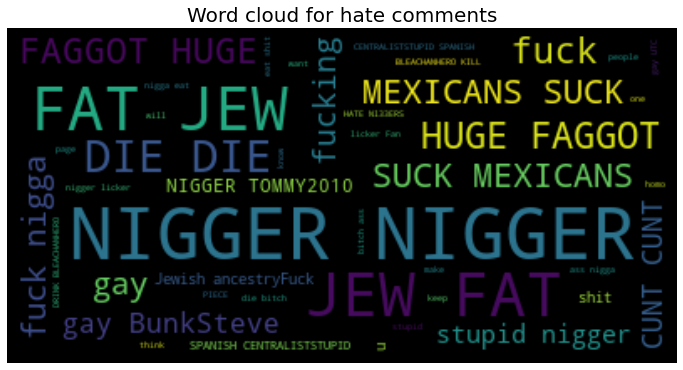

In [16]:
threatIdHate = train.loc[train['identity_hate'] == 1]

idHateWC = makeWC(threatIdHate)
plt.figure(figsize=(12, 15))
plt.title("Word cloud for hate comments", fontsize=20)
plt.axis("off")
plt.imshow(idHateWC, interpolation = 'bilinear')

### The training set size is reduced to save time on training

In [17]:
r = np.arange(train.shape[0])
trainIds = pd.Series(r).sample(int(len(train)/20))
testIds = list(set(r) - set(trainIds))
df = train
train = df.loc[trainIds]
test = df.loc[testIds]

In [18]:
max(testIds)

159570

## 3. Baseline Model

### Label preparation

In [19]:
yTrain = train.loc[:, commentClasses].values
yTest = test.loc[:, commentClasses].values

### 3.1 Deterministic classifier
In this situation we predict that comments do not contain any toxicity, this will be a good reference, to sort out bad algorithms

In [20]:
detPreds = np.zeros((yTest.shape[0], 6))

### 3.2 Bag of words with a random forest classifier

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

bowModel = Pipeline([
    ('vectorizer', CountVectorizer(analyzer = "word", ngram_range = (1,1), binary = True)),
    ('classifier', RandomForestClassifier(100))
])

In [22]:
bowModel.fit(train["comment_text"], yTrain)

Pipeline(steps=[('vectorizer', CountVectorizer(binary=True)),
                ('classifier', RandomForestClassifier())])

In [23]:
bowPreds = np.array(bowModel.predict_proba(test["comment_text"]))[:,:,1].transpose()

## 4. Data tokenization and padding

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
maxsequence = 120

In [25]:
maxwords = 15000
tokenizer = Tokenizer(num_words = maxwords)
tokenizer.fit_on_texts(train["comment_text"])

xTrain = pad_sequences(tokenizer.texts_to_sequences(train["comment_text"]), maxlen=maxsequence)
xTest = pad_sequences(tokenizer.texts_to_sequences(test["comment_text"]), maxlen=maxsequence)

## 5. FastText embeddings matrix

In [26]:
import io

def load_vectors_words(fname, words):
    """Loads embeddings from a FastText file. Only loads embeddings for the given dictionary of words"""
    data = {}
    with open(fname) as fin:
        next(fin)  # Skip first line, just contains embeddings size data
        for line in fin:
            tokens = line.rstrip().split(' ')
            word = tokens[0]
            if word in words:
                data[word] = np.array(list(map(float, tokens[1:])))
    return data


In [27]:
def create_embedding_matrix(embeddings, tokenizer):
    """Creates a weight matrix for an Embedding layer using an embeddings dictionary and a Tokenizer"""
    
    # Compute mean and standard deviation for embeddings
    all_embs = np.stack(embeddings.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    
    embedding_size = len(next(iter(embeddings.values())))
    
    embedding_matrix = np.random.normal(emb_mean, emb_std, (tokenizer.num_words, embedding_size))
    for word, i in tokenizer.word_index.items():
        if i >= tokenizer.num_words: break
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix

We must realign the fastText embedding matrix with token indexes, as well as creating random vectors for the words appearing in the corpus.

In [28]:
data = load_vectors_words('wiki-news-300d-1M.vec', tokenizer.word_index)
embedMat = create_embedding_matrix(data, tokenizer)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
from keras.layers.embeddings import Embedding
pretrained = Embedding(maxwords, embedMat.shape[1], weights=[embedMat], trainable=False)

## 6. Continuous Bag of Words model (CBoW) with FastText embedding matrix

In [30]:
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import GlobalMaxPool1D, GlobalAveragePooling1D, concatenate, Input, SpatialDropout1D

In [31]:
inp = Input(shape=(maxsequence, ))
x = Embedding(maxwords, embedMat.shape[1], weights=[embedMat], trainable=False)(inp)
x = GlobalAveragePooling1D()(x)
x = Dense(100, activation='relu')(x)
outp = Dense(6, activation="sigmoid")(x)

ftModel = Model(inputs=inp, outputs=outp)

ftModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
ftModel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 120, 300)          4500000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               30100     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 4,530,706
Trainable params: 30,706
Non-trainable params: 4,500,000
_________________________________________________________________


In [32]:
ftModel.fit(xTrain, yTrain, batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 975us/step - loss: 0.1920 - accuracy: 0.8818
Epoch 2/50
250/250 [==============================] - 0s 949us/step - loss: 0.1307 - accuracy: 0.9937
Epoch 3/50
250/250 [==============================] - 0s 948us/step - loss: 0.1272 - accuracy: 0.9937
Epoch 4/50
250/250 [==============================] - 0s 953us/step - loss: 0.1231 - accuracy: 0.9936
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9937
Epoch 6/50
250/250 [==============================] - 0s 939us/step - loss: 0.1131 - accuracy: 0.9937
Epoch 7/50
250/250 [==============================] - 0s 961us/step - loss: 0.1099 - accuracy: 0.9937
Epoch 8/50
250/250 [==============================] - 0s 952us/step - loss: 0.1055 - accuracy: 0.9937
Epoch 9/50
250/250 [==============================] - 0s 952us/step - loss: 0.1034 - accuracy: 0.9937
Epoch 10/50
250/250 [==============================] - 0s 958us/step - loss: 0.0998 

In [33]:
ftPreds = ftModel.predict(xTest)

## 7. Results

Given how imbalanced the data is, it made most sense to use the ROC AuC scores as a basis for comparing the performances 

In [34]:
from sklearn.metrics import roc_auc_score
detAUC = roc_auc_score(yTest, detPreds)
bowAUC = roc_auc_score(yTest, bowPreds)
ftAUC = roc_auc_score(yTest, ftPreds)

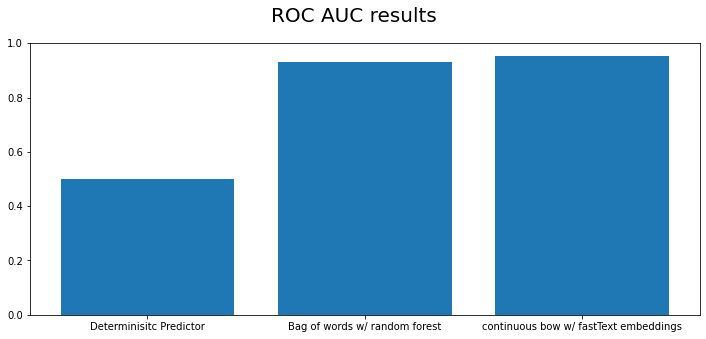

In [38]:
fig = plt.figure(figsize=(12, 5))

fig.suptitle('ROC AUC results', fontsize=20)

plt.bar(['Determinisitc Predictor', 'Bag of words w/ random forest', 'continuous bow w/ fastText embeddings'], [detAUC, bowAUC, ftAUC])
plt.savefig('results.png')